# What Music Do UWaterloo Students Listen To?

An expoloratory data anlysis (EDA) of the type of music UWaterloo students listen to. Self-reported data was collected from roughly 400 UW students.

TO DO:
 - fav song (word cloud)
 - fav album (word cloud)
 - most listened to genres (bar) 
 - genres compared by faculty??
 
 * style the visualizations
 * clean up & make documentation better


In [1]:
# adding libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import fontManager, FontProperties

In [2]:
# dataset
df = pd.read_csv('responses-data.csv')

# font for graphs
font_path = 'fonts/Lexend/static/Lexend-Medium.ttf'
fontManager.addfont(font_path)
prop = FontProperties(fname=font_path)
sns.set(font=prop.get_name())

# colour palette for all visualizations

# add custom color palette once design idea is finished ---------
#my_palette = ["#FF0000", "#00FF00", "#0000FF"]
#sns.set_palette(my_palette)

sns.set_palette("hls") # remove later

## Do UW students listen to music when studying?

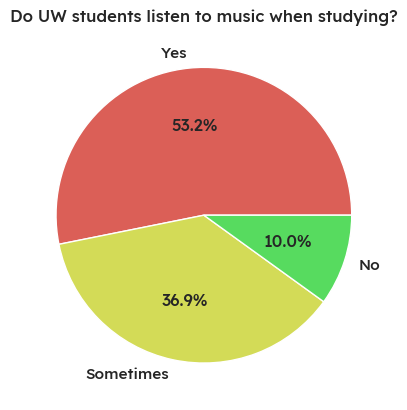

In [3]:
# extract data from related column
col_name = "Do you listen to music when you study?"
music_study_data = df[col_name].value_counts()

# create pie graph
plt.pie(music_study_data, labels=music_study_data.index, autopct='%1.1f%%')
plt.title('Do UW students listen to music when studying?')
plt.show()

It looks like the majority of students prefer to listen to music when they study!

## What music streaming services do UW students use?

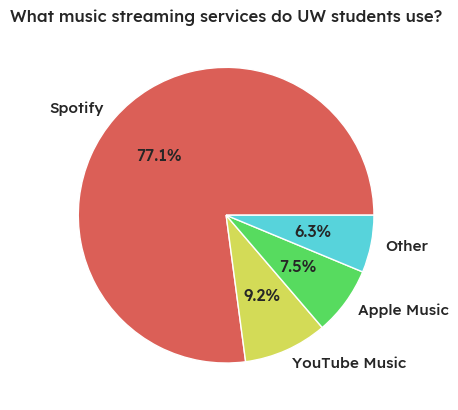

In [4]:
# extract data from related column
col_name = "What music streaming service do you primarily use?"

# replace all other answers to 'Other'
streaming_services = ['Spotify', 'Apple Music', 'YouTube Music']
df[col_name] = df[col_name].where(df[col_name].isin(streaming_services), 'Other')

streaming_service_data = df[col_name].value_counts()

# create pie graph
plt.pie(streaming_service_data, labels=streaming_service_data.index, autopct='%1.1f%%')
plt.title('What music streaming services do UW students use?')
plt.show()

Looks like the vast majority of UWaterloo students primarily use Spotify as their streaming service! Some of the popular "Other" answers included CDs and Pirated Music.

## Who are UW's favorite artists/bands?

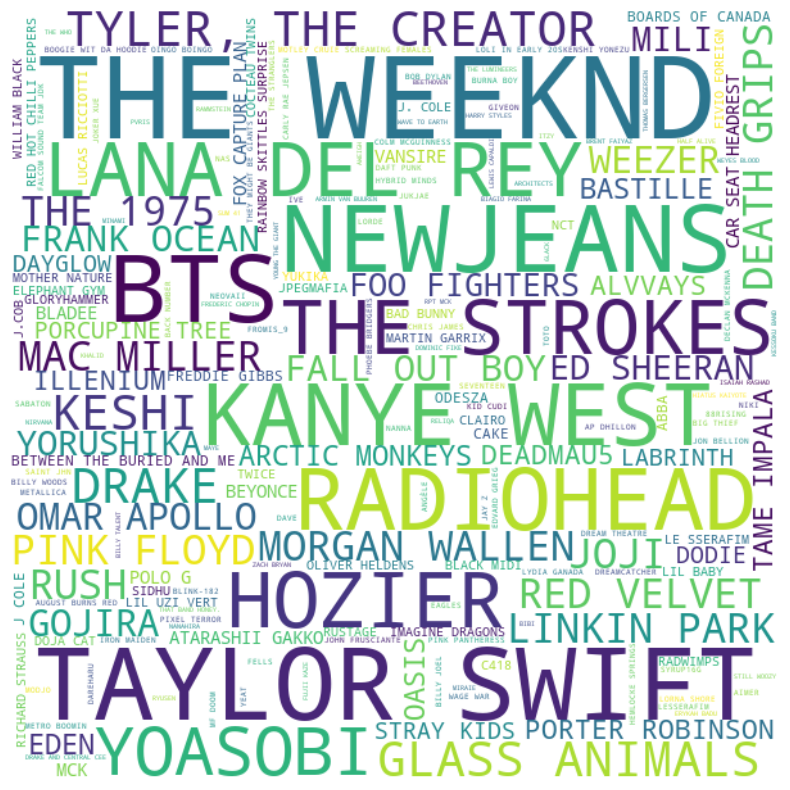

In [7]:
from wordcloud import WordCloud

# extract data from related column
col_name = "Who is your favourite artist/band right now?"
fav_artists_data = df[col_name]

# clean up responses
fav_artists_data = fav_artists_data.str.rstrip()
fav_artists_data_caps = fav_artists_data.str.upper()

# convert data to strings
fav_artists_data_caps = fav_artists_data_caps.astype(str)

# break up into distinct artists/bands
artists = fav_artists_data_caps.tolist()

# count the frequency of each artist
artist_counts = {}
for artist in artists:
    if artist in artist_counts:
        artist_counts[artist] += 1
    else:
        artist_counts[artist] = 1

# remove all the "nan" entries
artist_counts['nan'] = 0
        
# create word cloud
wordcloud = WordCloud(width=600, height=600, background_color='white').generate_from_frequencies(artist_counts)

# display word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The results show us that The Weeknd, Taylor Swift, NewJeans, Radiohead, Lana Del Ray, BTS, and Kanye West are some the favorite artists/bands among the UWaterloo student body!